In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import cv2

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf

In [4]:
image_dir = Path('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset')

In [5]:
# Get filepaths and corresponding labels for the images
filepaths = list(image_dir.glob(r'**/*.png'))  # Get all file paths
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))  # Extract labels from file paths

In [6]:
filepaths[0:2]

[PosixPath('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'),
 PosixPath('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00704.png')]

In [7]:
set(labels)

{'Black Sea Sprat',
 'Black Sea Sprat GT',
 'Gilt-Head Bream',
 'Gilt-Head Bream GT',
 'Hourse Mackerel',
 'Hourse Mackerel GT',
 'Red Mullet',
 'Red Mullet GT',
 'Red Sea Bream',
 'Red Sea Bream GT',
 'Sea Bass',
 'Sea Bass GT',
 'Shrimp',
 'Shrimp GT',
 'Striped Red Mullet',
 'Striped Red Mullet GT',
 'Trout',
 'Trout GT'}

In [8]:
# Create a DataFrame to store filepaths and labels
image_df = pd.DataFrame({'Filepath': filepaths, 'Label': labels})
image_df.head()

Filepath            Label
0  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
1  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
2  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
3  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
4  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel

In [9]:
# Remove images with labels ending with 'GT'
image_df = image_df[~image_df['Label'].str.contains('GT')]

In [10]:
image_df.Label

0        Hourse Mackerel
1        Hourse Mackerel
2        Hourse Mackerel
3        Hourse Mackerel
4        Hourse Mackerel
              ...       
16995      Red Sea Bream
16996      Red Sea Bream
16997      Red Sea Bream
16998      Red Sea Bream
16999      Red Sea Bream
Name: Label, Length: 9000, dtype: object

In [11]:
samples = []  # Initialize an empty list to store sampled images

# Loop through each unique category (label)
for category in image_df['Label'].unique():
    # Create a subset of data for the current category
    category_subset = image_df[image_df['Label'] == category]
    
    # Randomly sample 200 images from the current category
    sampled_images = category_subset.sample(n=200, random_state=1)
    
    # Append the sampled images to the list
    samples.append(sampled_images)

print(samples)

[                                              Filepath            Label
507  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
818  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
452  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
368  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
242  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
..                                                 ...              ...
430  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
874  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
550  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
608  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
207  ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel

[200 rows x 2 columns],                                                Filepath            Label
3507  ../input/a-large-scale-fish-dat

In [12]:
# Combine all sampled images from different categories into one DataFrame
image_df = pd.concat(samples)

# Shuffle the DataFrame to mix the order of samples
image_df = image_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [13]:
image_df.head()

Filepath            Label
0  ../input/a-large-scale-fish-dataset/Fish_Datas...  Gilt-Head Bream
1  ../input/a-large-scale-fish-dataset/Fish_Datas...         Sea Bass
2  ../input/a-large-scale-fish-dataset/Fish_Datas...       Red Mullet
3  ../input/a-large-scale-fish-dataset/Fish_Datas...           Shrimp
4  ../input/a-large-scale-fish-dataset/Fish_Datas...            Trout

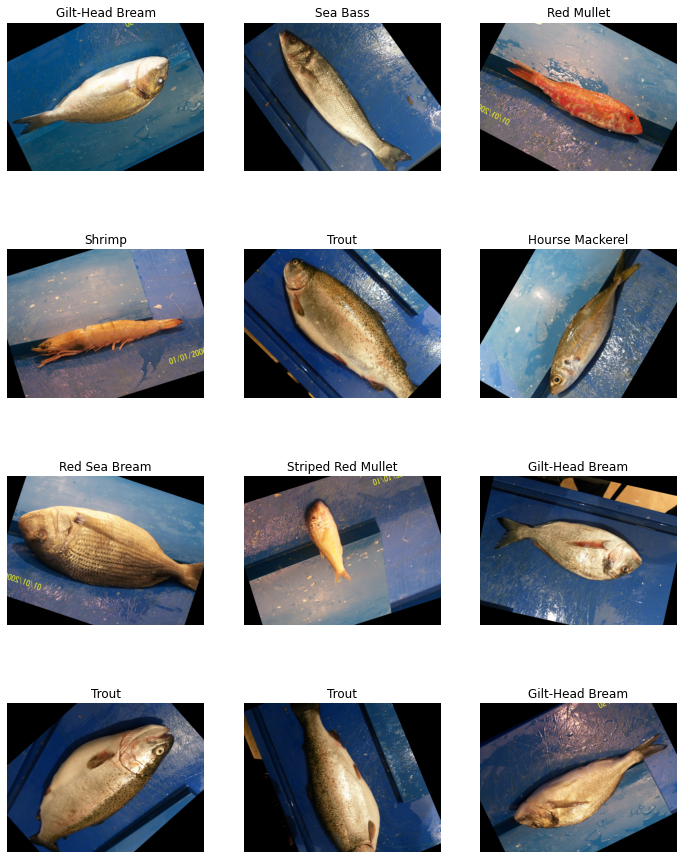

In [14]:
import matplotlib.pyplot as plt

num_images=12
images_per_row=3
num_rows=num_images//images_per_row
plt.figure(figsize=(12,4*num_rows))
for i in range(num_images):
    image_path = image_df['Filepath'].iloc[i]
    label=image_df['Label'].iloc[i]
    image=plt.imread(image_path)
    
    plt.subplot(num_rows, images_per_row, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()


In [15]:
# Load and preprocess images using OpenCV
def preprocess_image(image_path):
    image = cv2.imread(str(image_path))
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

In [16]:
# Load images and labels
images = np.array([preprocess_image(path) for path in image_df['Filepath']])
labels = pd.get_dummies(image_df['Label']).values  # One-hot encode labels


In [17]:
print(labels)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [18]:
# Split the dataset into training and testing sets
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,test_size=0.2,random_state=42)

In [19]:
print(len(train_images))
print(len(test_images))

1440
360


In [20]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [21]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [23]:
history = model1.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/30
45/45 [==============================] - 6s 54ms/step - loss: 2.1996 - accuracy: 0.1277 - val_loss: 1.9755 - val_accuracy: 0.2333
Epoch 2/30
45/45 [==============================] - 1s 33ms/step - loss: 1.5774 - accuracy: 0.4315 - val_loss: 1.2092 - val_accuracy: 0.5944
Epoch 3/30
45/45 [==============================] - 1s 33ms/step - loss: 0.9388 - accuracy: 0.6599 - val_loss: 0.9542 - val_accuracy: 0.6667
Epoch 4/30
45/45 [==============================] - 2s 33ms/step - loss: 0.5437 - accuracy: 0.8184 - val_loss: 0.5757 - val_accuracy: 0.8111
Epoch 5/30
45/45 [==============================] - 1s 33ms/step - loss: 0.2660 - accuracy: 0.9070 - val_loss: 0.5223 - val_accuracy: 0.8389
Epoch 6/30
45/45 [==============================] - 2s 34ms/step - loss: 0.1525 - accuracy: 0.9498 - val_loss: 0.4702 - val_accuracy: 0.8722
Epoch 7/30
45/45 [==============================] - 1s 33ms/step - loss: 0.0837 - accuracy: 0.9717 - val_loss: 0.4277 - val_accuracy: 0.8889
Epoch 8/30
45

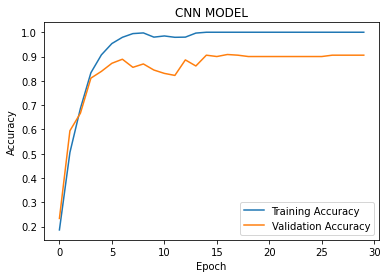

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN MODEL')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [26]:
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [27]:
# Freeze the base model
vgg16_model.trainable = False

In [28]:
# Add custom classification layers on top of VGG16
model2 = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])

In [29]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model2.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
45/45 [==============================] - 6s 98ms/step - loss: 4.9965 - accuracy: 0.3635 - val_loss: 0.3407 - val_accuracy: 0.8722
Epoch 2/10
45/45 [==============================] - 4s 81ms/step - loss: 0.1186 - accuracy: 0.9705 - val_loss: 0.1248 - val_accuracy: 0.9694
Epoch 3/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9833
Epoch 4/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9889
Epoch 5/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9861
Epoch 6/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 7/10
45/45 [==============================] - 4s 81ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9944
Epoch 8/10
45

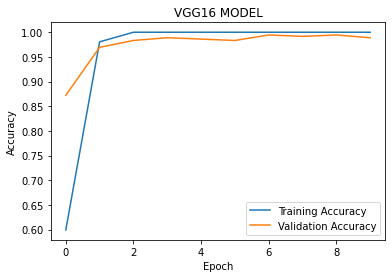

In [31]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG16 MODEL")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [33]:
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17227776/17225924 [==============================] - 0s 0us/step


In [34]:
mobilenet_model.trainable = False

In [35]:
model3 = Sequential([
    mobilenet_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax') 
])

In [36]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history = model3.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
45/45 [==============================] - 4s 51ms/step - loss: 1.1647 - accuracy: 0.6686 - val_loss: 0.1837 - val_accuracy: 0.9444
Epoch 2/10
45/45 [==============================] - 1s 32ms/step - loss: 0.1167 - accuracy: 0.9615 - val_loss: 0.0639 - val_accuracy: 0.9833
Epoch 3/10
45/45 [==============================] - 1s 32ms/step - loss: 0.0381 - accuracy: 0.9951 - val_loss: 0.0513 - val_accuracy: 0.9778
Epoch 4/10
45/45 [==============================] - 1s 33ms/step - loss: 0.0137 - accuracy: 0.9998 - val_loss: 0.0350 - val_accuracy: 0.9917
Epoch 5/10
45/45 [==============================] - 1s 32ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9944
Epoch 6/10
45/45 [==============================] - 1s 32ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 7/10
45/45 [==============================] - 1s 32ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9944
Epoch 8/10
45

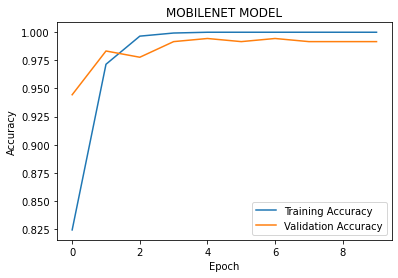

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("MOBILENET MODEL")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
model1.save('fish_cnn_model.h5')

In [41]:
model2.save('fish_vgg16_model.h5')

In [42]:
model3.save('fish_mobilenet_model.h5')

In [43]:
vgg16_model = tf.keras.models.load_model('fish_vgg16_model.h5')
mobilenet_model = tf.keras.models.load_model('fish_mobilenet_model.h5')
custom_cnn_model = tf.keras.models.load_model('fish_cnn_model.h5')

In [44]:
image_dir = Path('../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset')

In [45]:
def preprocess_image(image_path):
    image = cv2.imread(str(image_path))
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image

In [66]:
filepaths = list(image_dir.glob(r'**/*.png'))[:12]
images = np.array([preprocess_image(path) for path in filepaths])

In [67]:
vgg16_predictions = vgg16_model.predict(np.array(images))

In [68]:
mobilenet_predictions = mobilenet_model.predict(np.array(images))

In [69]:
custom_cnn_predictions = custom_cnn_model.predict(np.array(images))

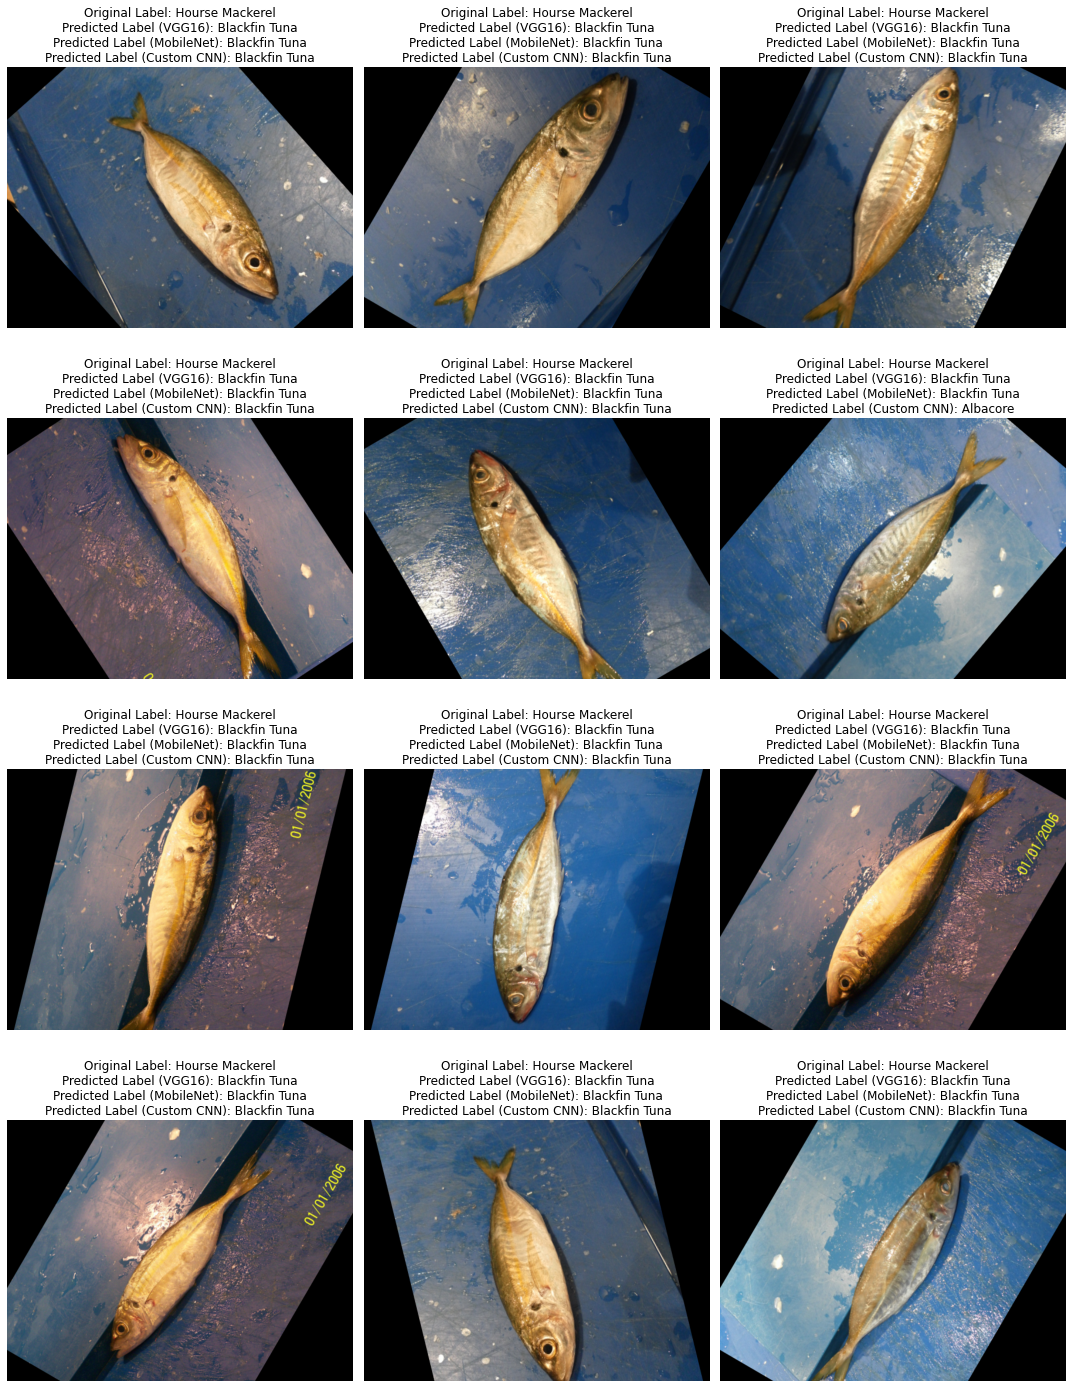

In [70]:
# Get the original labels
original_labels = [path.parent.name for path in filepaths]

# Class labels
class_labels = ['Albacore', 'Bigeye Tuna', 'Blackfin Tuna', 'Bluefin Tuna', 'Bonito',
                'Striped Marlin', 'Skipjack Tuna', 'Yellowfin Tuna', 'Other']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for i in range(4):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(filepaths):
            image_path = filepaths[idx]
            vgg_pred = vgg16_predictions[idx]
            mobilenet_pred = mobilenet_predictions[idx]
            custom_cnn_pred = custom_cnn_predictions[idx]
            original_label = original_labels[idx]
            
            # Load and display the image
            image = cv2.imread(str(image_path))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(image)
            axes[i, j].set_title('Original Label: {}\nPredicted Label (VGG16): {}\nPredicted Label (MobileNet): {}\nPredicted Label (Custom CNN): {}'.format(original_label, class_labels[np.argmax(vgg_pred)], class_labels[np.argmax(mobilenet_pred)], class_labels[np.argmax(custom_cnn_pred)]))
            axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()